In [3]:
## ---- Level 1------### 
# ---- TASK 1: Data Exploration and Preprocessing ----

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 1. Load the dataset
df = pd.read_csv("Dataset1.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
# 2. Identify number of rows and columns
print("Shape of dataset (rows, columns):", df.shape)

Shape of dataset (rows, columns): (9551, 21)


In [5]:
# 3. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [6]:
# 4. Handle missing values
# Numeric columns -> fill with median
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [7]:
# Categorical columns -> fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
# 5. Perform data type conversion if necessary
# Convert Yes/No columns into binary (0,1)
yes_no_cols = ["Has Table booking","Has Online delivery","Is delivering now","Switch to order menu"]
for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].map({"Yes":1, "No":0})

print("\nData types after conversion:")
print(df.dtypes)



Data types after conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Switch to order menu      int64
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [9]:
# 6. Analyze distribution of target variable (Aggregate rating)
print("\nAggregate Rating distribution:")
print(df["Aggregate rating"].value_counts().sort_index())


Aggregate Rating distribution:
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


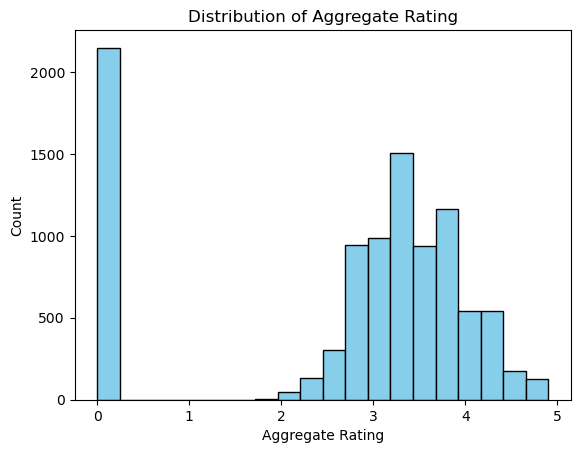

In [10]:
# Plot histogram for Aggregate rating
plt.hist(df["Aggregate rating"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

In [ ]:


# ---- TASK 2: Descriptive Analysis ----




In [5]:
# --- Step A: Basic Statistical Measures for Numerical Columns ---
print("Basic Statistics for Numerical Columns:\n")
print(df.describe().T[["mean","50%","std","min","max"]].rename(columns={"50%":"median"}))

Basic Statistics for Numerical Columns:

                              mean        median           std         min  \
Restaurant ID         9.051128e+06  6.004089e+06  8.791521e+06   53.000000   
Country Code          1.836562e+01  1.000000e+00  5.675055e+01    1.000000   
Longitude             6.412657e+01  7.719196e+01  4.146706e+01 -157.948486   
Latitude              2.585438e+01  2.857047e+01  1.100794e+01  -41.330428   
Average Cost for two  1.199211e+03  4.000000e+02  1.612118e+04    0.000000   
Price range           1.804837e+00  2.000000e+00  9.056088e-01    1.000000   
Aggregate rating      2.666370e+00  3.200000e+00  1.516378e+00    0.000000   
Votes                 1.569097e+02  3.100000e+01  4.301691e+02    0.000000   

                               max  
Restaurant ID         1.850065e+07  
Country Code          2.160000e+02  
Longitude             1.748321e+02  
Latitude              5.597698e+01  
Average Cost for two  8.000000e+05  
Price range           4.000000e+00


Country Code Distribution (Top 10):
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


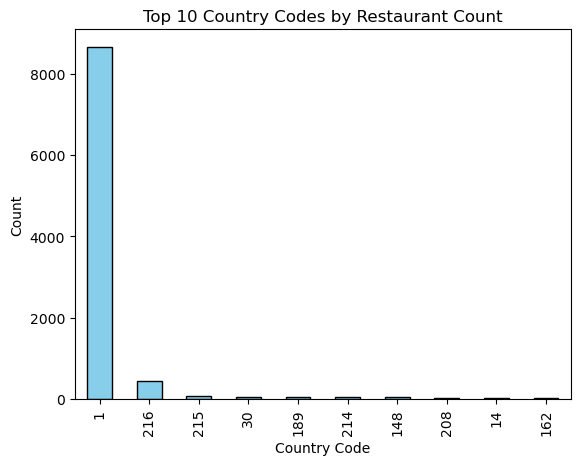

In [6]:
# --- Step B: Distribution of Categorical Variables ---

# Country Code distribution
print("\nCountry Code Distribution (Top 10):")
print(df["Country Code"].value_counts().head(10))

df["Country Code"].value_counts().head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Country Codes by Restaurant Count")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.show()


City Distribution (Top 10):
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


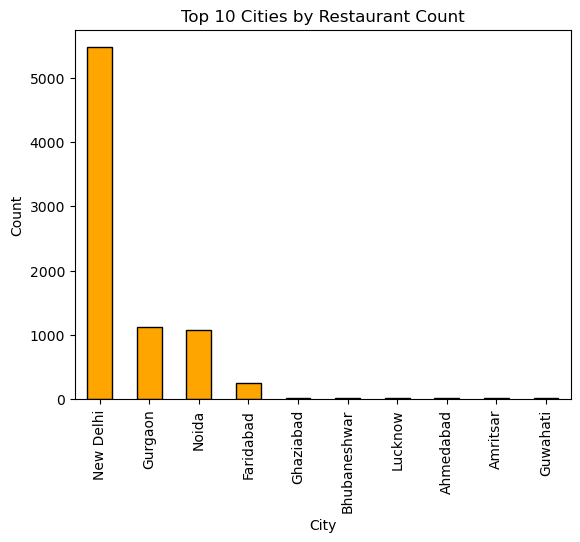

In [7]:
# City distribution
print("\nCity Distribution (Top 10):")
print(df["City"].value_counts().head(10))

df["City"].value_counts().head(10).plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()



Cuisines Distribution (Top 10):
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


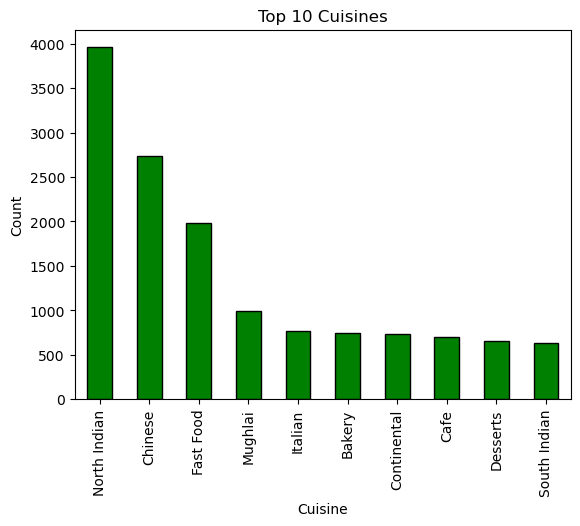

In [8]:
# Cuisines distribution (need to split because multiple cuisines in one cell)
cuisines_series = (
    df["Cuisines"]
    .dropna()
    .astype(str)
    .str.split(",")
    .explode()
    .str.strip()
)

print("\nCuisines Distribution (Top 10):")
print(cuisines_series.value_counts().head(10))

cuisines_series.value_counts().head(10).plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()

In [9]:
# --- Step C: Identify Top Cuisines and Cities ---

# Top 5 cities with highest number of restaurants
top_cities = df["City"].value_counts().head(5)

# First create cuisines_series (split by comma, explode)
cuisines_series = df["Cuisines"].dropna().astype(str).str.split(",").explode().str.strip()

# Top 5 cuisines with highest number of restaurants
top_cuisines = cuisines_series.value_counts().head(5)

print("\nTop 5 Cities with Highest Number of Restaurants:")
print(top_cities)

print("\nTop 5 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)


Top 5 Cities with Highest Number of Restaurants:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

Top 5 Cuisines with Highest Number of Restaurants:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64


In [ ]:

# ---- TASK 3: Geospatial Analysis ----


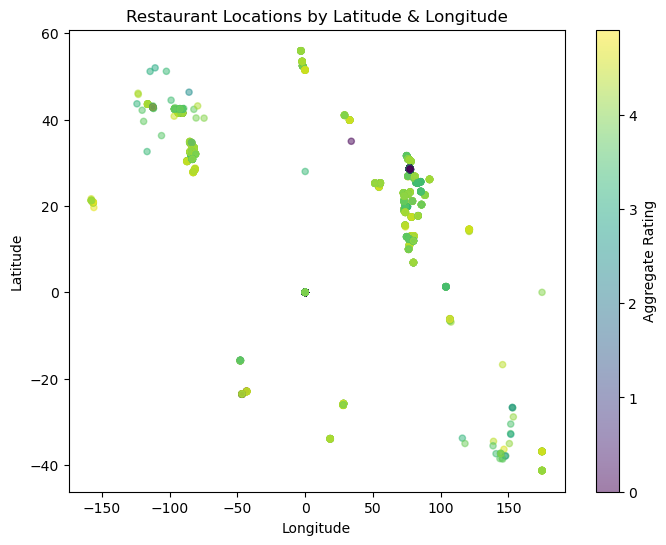

In [10]:
# --- Step A: Visualize locations using latitude and longitude ---
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], 
            c=df["Aggregate rating"], cmap="viridis", alpha=0.5, s=20)
plt.colorbar(label="Aggregate Rating")
plt.title("Restaurant Locations by Latitude & Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Top 10 Cities by Restaurant Count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


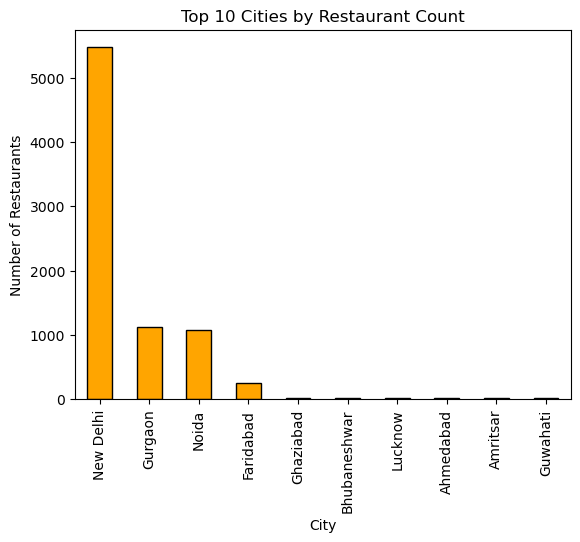

In [11]:
# --- Step B: Distribution across Cities ---
city_counts = df["City"].value_counts().head(10)
print("\nTop 10 Cities by Restaurant Count:")
print(city_counts)

city_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()


Top 10 Countries by Restaurant Count:
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


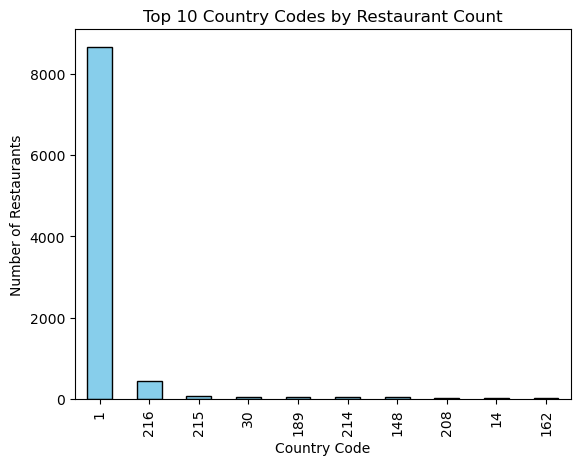

In [12]:
# --- Step C: Distribution across Country Codes ---
country_counts = df["Country Code"].value_counts().head(10)
print("\nTop 10 Countries by Restaurant Count:")
print(country_counts)

country_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Country Codes by Restaurant Count")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.show()


In [13]:
# --- Step D: Correlation between location and rating ---
# Checking correlation of Latitude and Longitude with Aggregate Rating
corr_lat = df["Latitude"].corr(df["Aggregate rating"])
corr_long = df["Longitude"].corr(df["Aggregate rating"])

print("\nCorrelation of Latitude with Aggregate Rating:", round(corr_lat,3))
print("Correlation of Longitude with Aggregate Rating:", round(corr_long,3))


Correlation of Latitude with Aggregate Rating: 0.001
Correlation of Longitude with Aggregate Rating: -0.117
